In [1]:
!pip install jieba

In [2]:
!pip install wordcloud

In [3]:
import os, jieba, json

In [4]:
import pandas as pd

In [5]:
with open('./test_1_c.json', 'r', encoding='utf-8-sig') as f:
    output = json.load(f)
print(output)
print(type(output))

{'_id': 'trp014166682', 'title': 'KUKA HOME 魯本斯 皮沙發 單人座 紅棕 M5659/SP 1s L008', 'Product number': '014166682', 'color': [], 'jpg': ['https://pcm.trplus.com.tw/650x650/sys-master/productImages/h6c/h0f/9164339380254/000000000014166682-gallery-01-20181019195036251.jpg', 'https://pcm.trplus.com.tw/650x650/sys-master/productImages/h6e/h0c/9164339445790/000000000014166682-gallery-02-20181019195036251.jpg', 'https://pcm.trplus.com.tw/650x650/sys-master/productImages/h5d/h09/9164339511326/000000000014166682-gallery-03-20181019195036251.jpg', 'https://pcm.trplus.com.tw/650x650/sys-master/productImages/haf/h08/9164339576862/000000000014166682-gallery-04-20181019195036251.jpg'], 'price': '$32,500', 'url': 'https://www.trplus.com.tw/p/014166682', 'Product Information': ['品牌 KUKA HOME 顧家家居', '所推出的皮沙發', '沙發造型獨特‧具優質設計感', '靠枕、靠背弧度貼合人體舒適角度', '扶手向內翻折設計，靠背貫穿', '側面支撐角度完全貼合扶手傾斜度', '獨特樹杈造型出支撐木腳，增加風格質感', 'KUKA HOME 魯本斯 皮沙發 單人座 紅棕 M5659/SP 1s L008', '【KUKA HOME 顧家家居】', '以融合頂級原材料的珍貴品質與世界最先進的製作工藝，凝聚來自義大利、法國、德國、日本

In [6]:
analysis_1 = list(output.values())[1]
print(analysis_1)
print(type(analysis_1))

KUKA HOME 魯本斯 皮沙發 單人座 紅棕 M5659/SP 1s L008
<class 'str'>


In [7]:
analysis_2 = str(list(output.values())[7])
print(analysis_2)
print(type(analysis_2))

['品牌 KUKA HOME 顧家家居', '所推出的皮沙發', '沙發造型獨特‧具優質設計感', '靠枕、靠背弧度貼合人體舒適角度', '扶手向內翻折設計，靠背貫穿', '側面支撐角度完全貼合扶手傾斜度', '獨特樹杈造型出支撐木腳，增加風格質感', 'KUKA HOME 魯本斯 皮沙發 單人座 紅棕 M5659/SP 1s L008', '【KUKA HOME 顧家家居】', '以融合頂級原材料的珍貴品質與世界最先進的製作工藝，凝聚來自義大利、法國、德國、日本、美國及英國等頂尖設計師陣容，至今已榮獲超過200項以上的家具設計大獎及各項專利。', '在品質部分，來自歐洲、美洲及澳洲的生皮，提供多種的顏色、紋理、皮面及厚度選擇，所有沙發商品皆經過反覆多次測試皮革本身韌性及張力，確保每一張牛皮沙發皆擁有絕佳的品質。', '目前已於荷蘭、新加坡，澳洲等多國擁有品牌專賣店，為全球每個消費者實現完美家居生活的夢想，自2011年起在台灣由HOLA CASA和樂名品傢俱取得獨家品牌銷售權。', '更多【', 'HOLA CASA傢俱系列', '】可供選購搭配，讓居家休閒更加完善舒適 ~']
<class 'str'>


### 分詞

In [8]:
seg_words_list = jieba.cut(analysis_1, cut_all=True)
print('/'.join(list(seg_words_list)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.759 seconds.
Prefix dict has been built successfully.


KUKA// //HOME// //魯/本/斯// //皮/沙/發// //單/人/座// //紅/棕// //M5659///SP// //1s// //L008


In [9]:
seg_words_list_2 = jieba.cut(analysis_2, cut_all=True)
print('/'.join(list(seg_words_list_2)))

['/品牌// //KUKA// //HOME// //顧/家家/家居/',/ /'/所/推出/的/皮/沙/發/',/ /'/沙/發/造型/獨/特/‧/具/優/質/設/計/感/',/ /'/靠枕/、/靠背/弧度/貼/合/人/體/舒/適/角度/',/ /'/扶手/向/內/翻/折/設/計/，/靠背/貫/穿/',/ /'/側/面/支/撐/角度/完全/貼/合/扶手/傾/斜度/',/ /'/獨/特/樹/杈/造型/出/支/撐/木/腳/，/增加/風/格/質/感/',/ /'/KUKA// //HOME// //魯/本/斯// //皮/沙/發// //單/人/座// //紅/棕// //M5659///SP// //1s// //L008/',/ /'【/KUKA// //HOME// //顧/家家/家居/】',/ /'/以/融合/頂/級/原材/原材料/材料/的/珍/貴/品/質/與/世界/最先/進/的/製/作工/藝/，/凝聚/來/自/義/大利/、/法/國/、/德/國/、/日本/、/美/國/及/英/國/等/頂/尖/設/計/師/陣/容/，/至今/已/榮/獲/超/過/200/項/以上/的/家具/設/計/大/獎/及/各/項/專/利/。',/ /'/在/品/質/部分/，/來/自/歐/洲/、/美洲/及/澳洲/的/生皮/，/提供/多/種/的/顏/色/、/紋/理/、/皮面/及/厚度/選/擇/，/所有/沙/發/商品/皆/經/過/反覆/多次/測/試/皮革/本身/韌/性/及/張/力/，/確/保/每/一/張/牛皮/沙/發/皆/擁/有/絕/佳/的/品/質/。',/ /'/目前/已/於/荷/蘭/、/新加坡/，/澳洲/等/多/國/擁/有/品牌/專/賣/店/，/為/全球/每/個/消/費/者/實/現/完美/家居/家居生活/生活/的/夢/想/，/自/2011/年/起/在/台/灣/由/HOLA// //CASA/和/樂/名品/傢/俱/取得/獨/家/品牌/銷/售/權/。',/ /'/更多/【',/ /'/HOLA// //CASA/傢/俱/系列/',/ /'】/可供/選/購/搭配/，/讓/居家/休/閒/更加/加完/完善/舒/適// /~']


### stop world and use mydict

In [10]:
with open(file='text_to_use/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '',
 'M5659',
 'SP',
 '1s',
 'L008',
 '',
 '200',
 '',
 '你',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '呢',
 '旁',
 '家',
 '緣',
 '初',
 '室',
 '內',
 '設',
 '計',
 '秦',
 '詣',
 '擎',
 '劉',
 '瀚',
 '陽',
 '陳',
 '正',
 '倫',
 '所',
 '具',
 '向',
 '出',
 '以',
 '來',
 '自',
 '及',
 '等',
 '在',
 '每',
 '皆',
 '項',
 '已',
 '於',
 '',
 '',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '小編',
 '帶你',
 '對於',
 '比較',
 '之王',
 '局部',
 '想像',
 '什麼',
 '',
 '人字',
 '公司',
 '品牌',
 '推出',
 '設計',
 '增加',
 '世界',
 '擁有',
 '',
 '',
 '',
 '看好宅',
 '設計師',
 '',
 '',
 '',
 '至今',
 '',
 '超過',
 '以上',
 '',
 '',
 '各項',
 '部分',
 '來自',
 '選擇',
 '所有',
 '商品',
 '',
 '經過',
 '反覆',
 '多次',
 '本身',
 '確保',
 '系列',
 '可供',
 '選購',
 '搭配',
 '讓',
 '更加',
 '完善',
 '取得',
 '獨家',
 '銷售權',
 '更',


In [11]:
jieba.load_userdict('./text_to_use/mydict.txt')

seg_stop_words_list_1 = []
seg_words_list = jieba.lcut(analysis_1)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list_1.append(term)
print('/'.join(seg_stop_words_list_1))

KUKA/HOME/魯本斯/皮沙發/單人座/紅棕


In [12]:
jieba.load_userdict('./text_to_use/mydict.txt')

seg_stop_words_list_2 = []
seg_words_list = jieba.lcut(analysis_2)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list_2.append(term)
print('/'.join(seg_stop_words_list_2))

KUKA/HOME/顧家家居/皮沙發/沙發/造型/獨特/優質/設計感/靠枕/靠背/弧度/貼合/人體/舒適/角度/扶手/翻折/靠背/貫穿/側面/支撐/角度/完全貼合/扶手/傾斜度/獨特樹杈造型/支撐/木腳/風格/質感/KUKA/HOME/魯本斯/皮沙發/單人座/紅棕/KUKA/HOME/顧家家居/融合/頂級/原材料/珍貴/品質/最先進/製作工藝/凝聚/義大利/法國/德國/日本/美國/英國/頂尖/陣容/榮獲/家具/設計大獎/專利/品質/歐洲/美洲/澳洲/生皮/顏色/紋理/皮面/厚度/沙發/測試/皮革/韌性/張力/牛皮沙發/絕佳/品質/荷蘭/新加坡/澳洲/完美/家居生活/夢想/2011/台灣/HOLA/CASA/名品/傢俱/HOLA/CASA/傢俱/居家/休閒/舒適


### word count

In [13]:
seg_words_list_1 = jieba.lcut(analysis_1)
seg_df = pd.DataFrame(seg_words_list_1, columns=['seg_word'])
print(seg_df)

   seg_word
0      KUKA
1          
2      HOME
3          
4       魯本斯
5          
6       皮沙發
7          
8       單人座
9          
10       紅棕
11         
12    M5659
13        /
14       SP
15         
16       1s
17         
18     L008


In [14]:
seg_words_list_2 = seg_stop_words_list_1
seg_df = pd.DataFrame(seg_words_list_2, columns=['seg_word'])
print(seg_df)

  seg_word
0     KUKA
1     HOME
2      魯本斯
3      皮沙發
4      單人座
5       紅棕


In [15]:
seg_words_list_3 = jieba.lcut(analysis_2)
seg_df = pd.DataFrame(seg_words_list_3, columns=['seg_word'])
print(seg_df)

    seg_word
0          [
1          '
2         品牌
3           
4       KUKA
..       ...
289       舒適
290         
291        ~
292        '
293        ]

[294 rows x 1 columns]


In [16]:
seg_words_list_4 = seg_stop_words_list_2
seg_df = pd.DataFrame(seg_words_list_4, columns=['seg_word'])
print(seg_df)

   seg_word
0      KUKA
1      HOME
2      顧家家居
3       皮沙發
4        沙發
..      ...
90     CASA
91       傢俱
92       居家
93       休閒
94       舒適

[95 rows x 1 columns]


In [17]:
from collections import Counter

In [18]:
seg_counter_1 = Counter(seg_words_list_2)
seg_counter_1

Counter({'KUKA': 1, 'HOME': 1, '魯本斯': 1, '皮沙發': 1, '單人座': 1, '紅棕': 1})

In [19]:
seg_counter_2 = Counter(seg_words_list_4)
seg_counter_2

Counter({'KUKA': 3,
         'HOME': 3,
         '顧家家居': 2,
         '皮沙發': 2,
         '沙發': 2,
         '造型': 1,
         '獨特': 1,
         '優質': 1,
         '設計感': 1,
         '靠枕': 1,
         '靠背': 2,
         '弧度': 1,
         '貼合': 1,
         '人體': 1,
         '舒適': 2,
         '角度': 2,
         '扶手': 2,
         '翻折': 1,
         '貫穿': 1,
         '側面': 1,
         '支撐': 2,
         '完全貼合': 1,
         '傾斜度': 1,
         '獨特樹杈造型': 1,
         '木腳': 1,
         '風格': 1,
         '質感': 1,
         '魯本斯': 1,
         '單人座': 1,
         '紅棕': 1,
         '融合': 1,
         '頂級': 1,
         '原材料': 1,
         '珍貴': 1,
         '品質': 3,
         '最先進': 1,
         '製作工藝': 1,
         '凝聚': 1,
         '義大利': 1,
         '法國': 1,
         '德國': 1,
         '日本': 1,
         '美國': 1,
         '英國': 1,
         '頂尖': 1,
         '陣容': 1,
         '榮獲': 1,
         '家具': 1,
         '設計大獎': 1,
         '專利': 1,
         '歐洲': 1,
         '美洲': 1,
         '澳洲': 2,
         '生皮': 1,
    

### 應用Panda

In [20]:
seg_df_1 = pd.DataFrame(seg_words_list_2, columns=['seg_word'])
seg_df_1

,seg_word
0,KUKA
1,HOME
2,魯本斯
3,皮沙發
4,單人座
5,紅棕


In [21]:
seg_df_1['count'] = 1
seg_freq_df_1 = seg_df_1.groupby('seg_word').sum()
seg_freq_df_1

,count
seg_word,
HOME,1
KUKA,1
單人座,1
皮沙發,1
紅棕,1
魯本斯,1


In [22]:
seg_df_2 = pd.DataFrame(seg_words_list_4, columns=['seg_word'])
seg_df_2

,seg_word
0,KUKA
1,HOME
2,顧家家居
3,皮沙發
4,沙發
...,...
90,CASA
91,傢俱
92,居家
93,休閒


In [23]:
seg_df_2['count'] = 1
seg_freq_df_2 = seg_df_2.groupby('seg_word').sum()
seg_freq_df_2

,count
seg_word,
2011,1
CASA,2
HOLA,2
HOME,3
KUKA,3
...,...
頂級,1
顏色,1
顧家家居,2


### 文字雲

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
print(matplotlib.matplotlib_fname())

c:\users\user\anaconda3\envs\python_project_2\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [26]:
print(matplotlib.get_configdir())

C:\Users\User\.matplotlib


In [27]:
#用來顯示中文
plt.rcParams['font.sans-serif']=['SimHei']
#用來顯示負號
plt.rcParams['axes.unicode_minus']=False

In [28]:
from collections import Counter

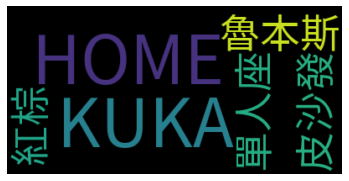

In [29]:
wordcloud = WordCloud(font_path='text_to_use/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter_1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

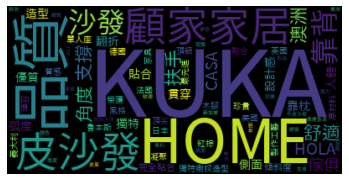

In [30]:
wordcloud = WordCloud(font_path='text_to_use/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter_2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()